# 최종 모델 학습

- 39개 카테고리
- yolov3-spp3 구조 사용
- 2만 -> 5만 2천개로 중간에 계속 데이터를 넣으면서 학습함
- 총 137 epoch , best는 125epochs에서 나옴



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,720 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [3]:
%cd drive/My Drive

/content/drive/My Drive


In [4]:
%cd yolov3

/content/drive/My Drive/yolov3


# train, test set 만들기

In [ ]:
import os
import random
random.seed(1234)
dir_name = 'data/custom/labels'
file_names = [k for k in os.listdir(dir_name)]
n = len(file_names)
numlist = range(0,n)
s = random.sample(numlist, int(n*0.8))
v = list(set(numlist)-set(s))
train = [file_names[k] for k in s]
test = [file_names[k] for k in v]
f = open('data/custom/train.txt','w')
for _ in train:
  if _[-7:-4] == 'xml':
    f.write('data/custom/images/' + _[:-7] +'jpg\n')
    os.rename('data/custom/labels/' + _,'data/custom/labels/' + _[:-7] +'txt')
  else:
    f.write('data/custom/images/' + _[:-3]+'jpg\n')
f.close()

g = open('data/custom/valid.txt','w')
for _ in test:
  if _[-7:-4] == 'xml':
    g.write('data/custom/images/'+ _[:-7] +'jpg\n')
    os.rename('data/custom/labels/' + _,'data/custom/labels/' + _[:-7] +'txt')
  else:
    g.write('data/custom/images/' + _[:-3]+'jpg\n')
g.close()

In [5]:
# 총 라벨수
dir_name = u'data/custom/labels/'
len(os.listdir(dir_name))

52606

# Training


In [ ]:
# !python3 train.py --cfg cfg/yolov3-spp3.cfg --data data/custom.data --epochs 100 --weights cfg/darknet53.conv.74 --batch-size 8
!python3 train.py --cfg cfg/yolov3-spp31.cfg --data data/custom.data --epochs 150 --weights weights/last.pt --batch-size 8

# test

In [7]:
!python3 test.py --cfg cfg/yolov3-spp31.cfg --data data/custom.data --weights weights/best.pt --batch-size 8

Namespace(augment=False, batch_size=8, cfg='cfg/yolov3-spp31.cfg', conf_thres=0.001, data='data/custom.data', device='', img_size=512, iou_thres=0.6, save_json=False, single_cls=False, task='test', weights='weights/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.40559e+07 parameters, 6.40559e+07 gradients
Fusing layers...
Model Summary: 152 layers, 6.40291e+07 parameters, 6.40291e+07 gradients
Caching labels data/custom/labels.npy (3843 found, 0 missing, 0 empty, 0 duplicate, for 10521 images):  37% 3843/10521 [00:00<00:00, 19064.93it/s]empty labels for image data/custom/images/르뱅쿠키2_81.jpg
empty labels for image data/custom/images/르뱅쿠키2_168.jpg
Caching labels data/custom/labels.npy (7741 found, 0 missing, 2 empty, 0 duplicate, for 10521 images):  74% 7743/10521 [00:00<00:00, 19323.30it/s]empty labels for image data/custom/images/르뱅쿠키1_456_trans.jpg
Caching labels data/custom/labels.npy (

# Metric

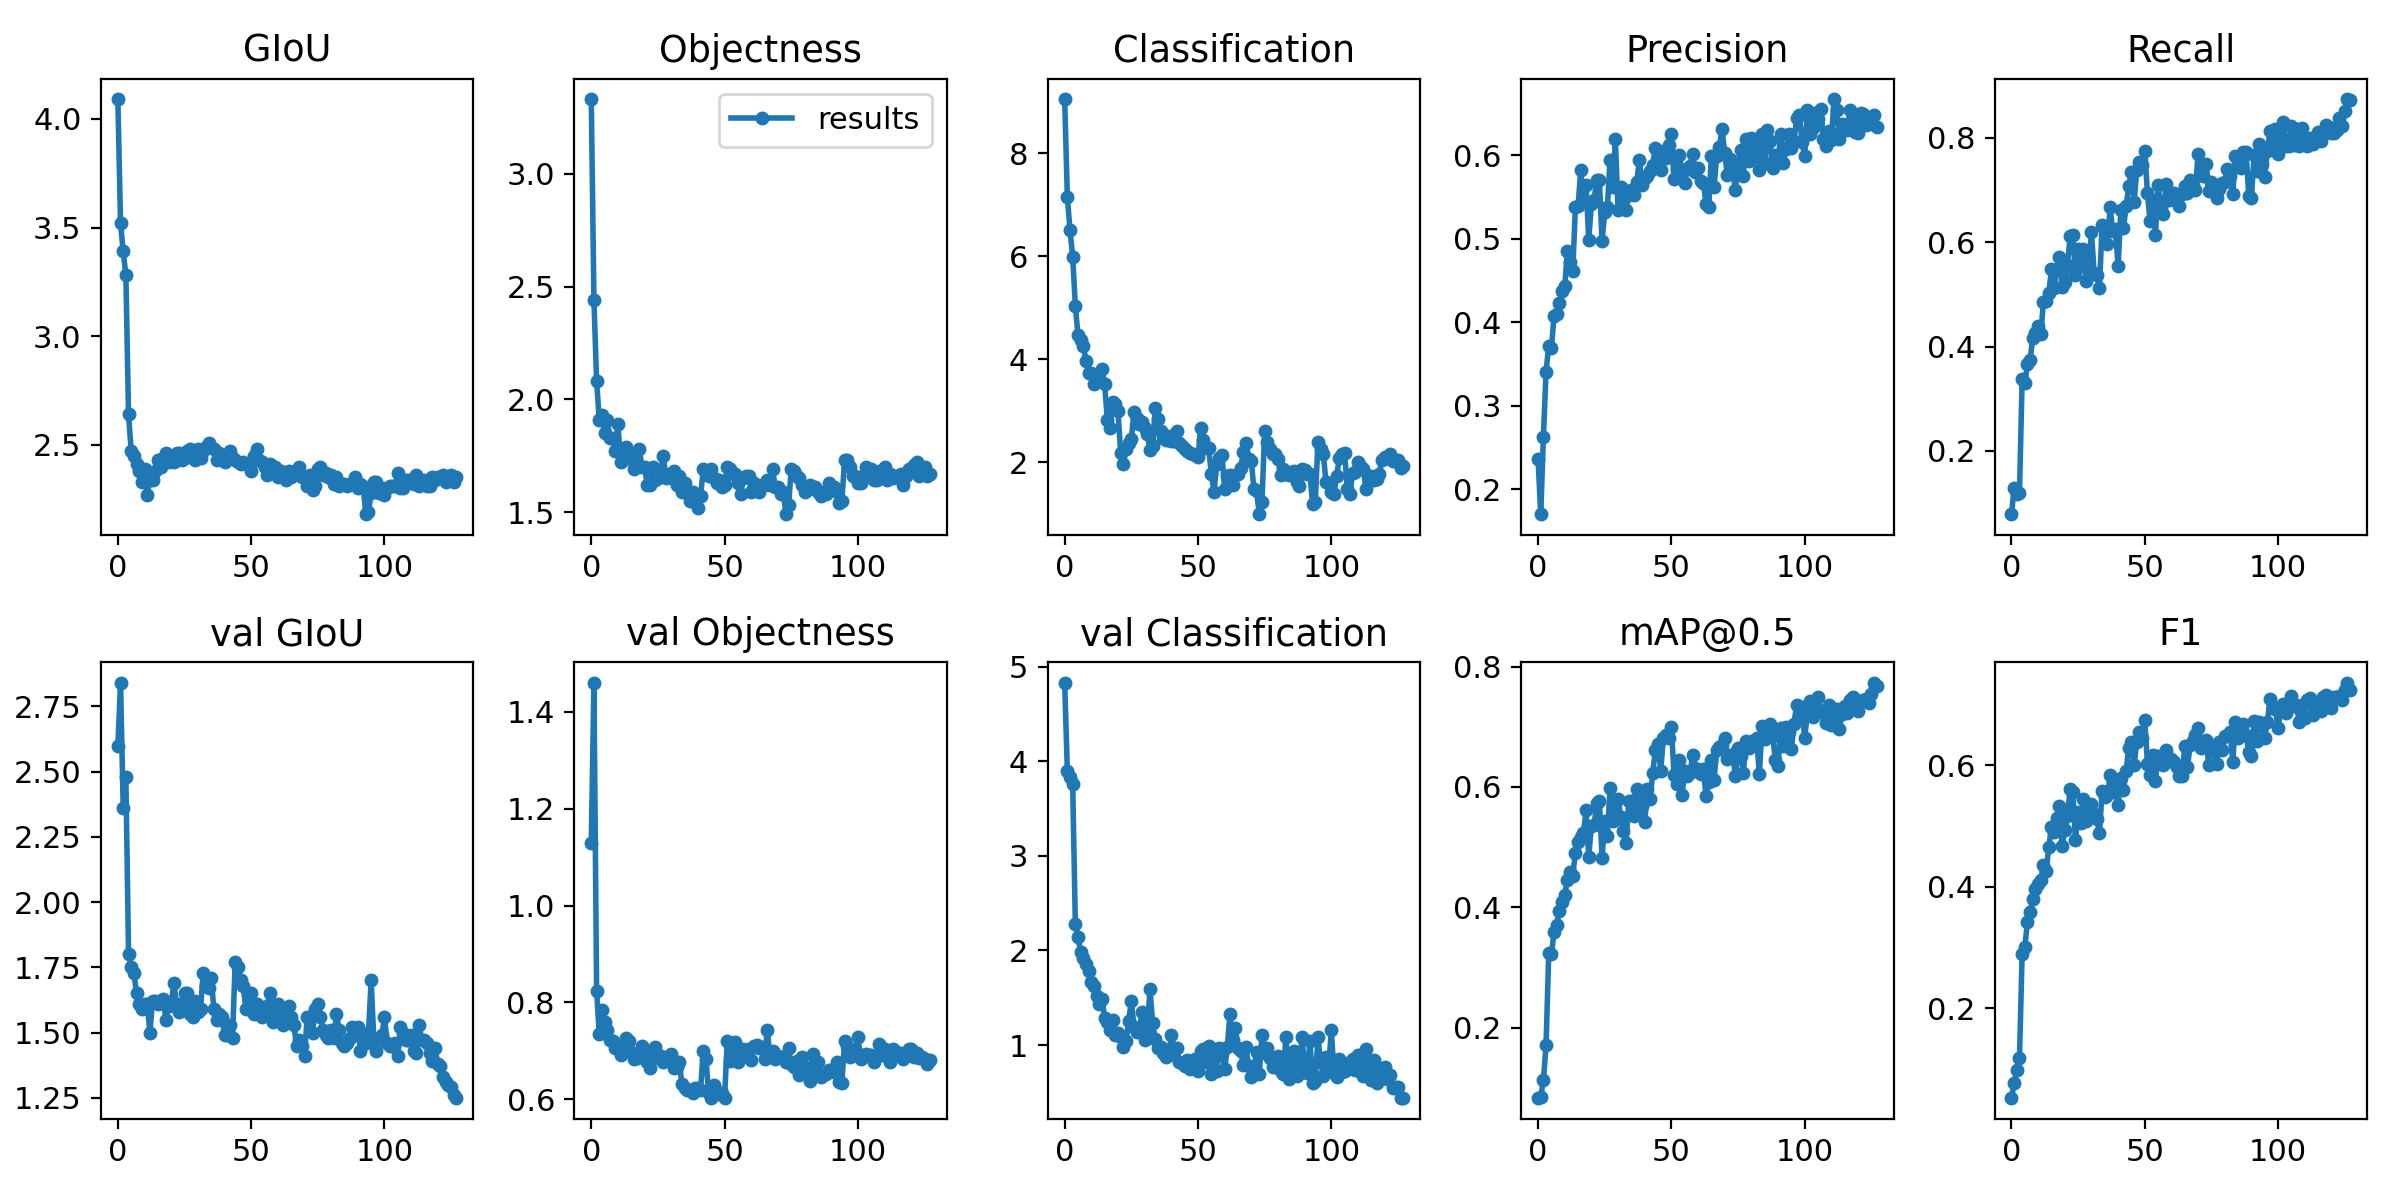

In [8]:
from PIL import Image
!python3 -c "from utils import utils; utils.plot_results()"  # plot training results
Image.open('results.png')

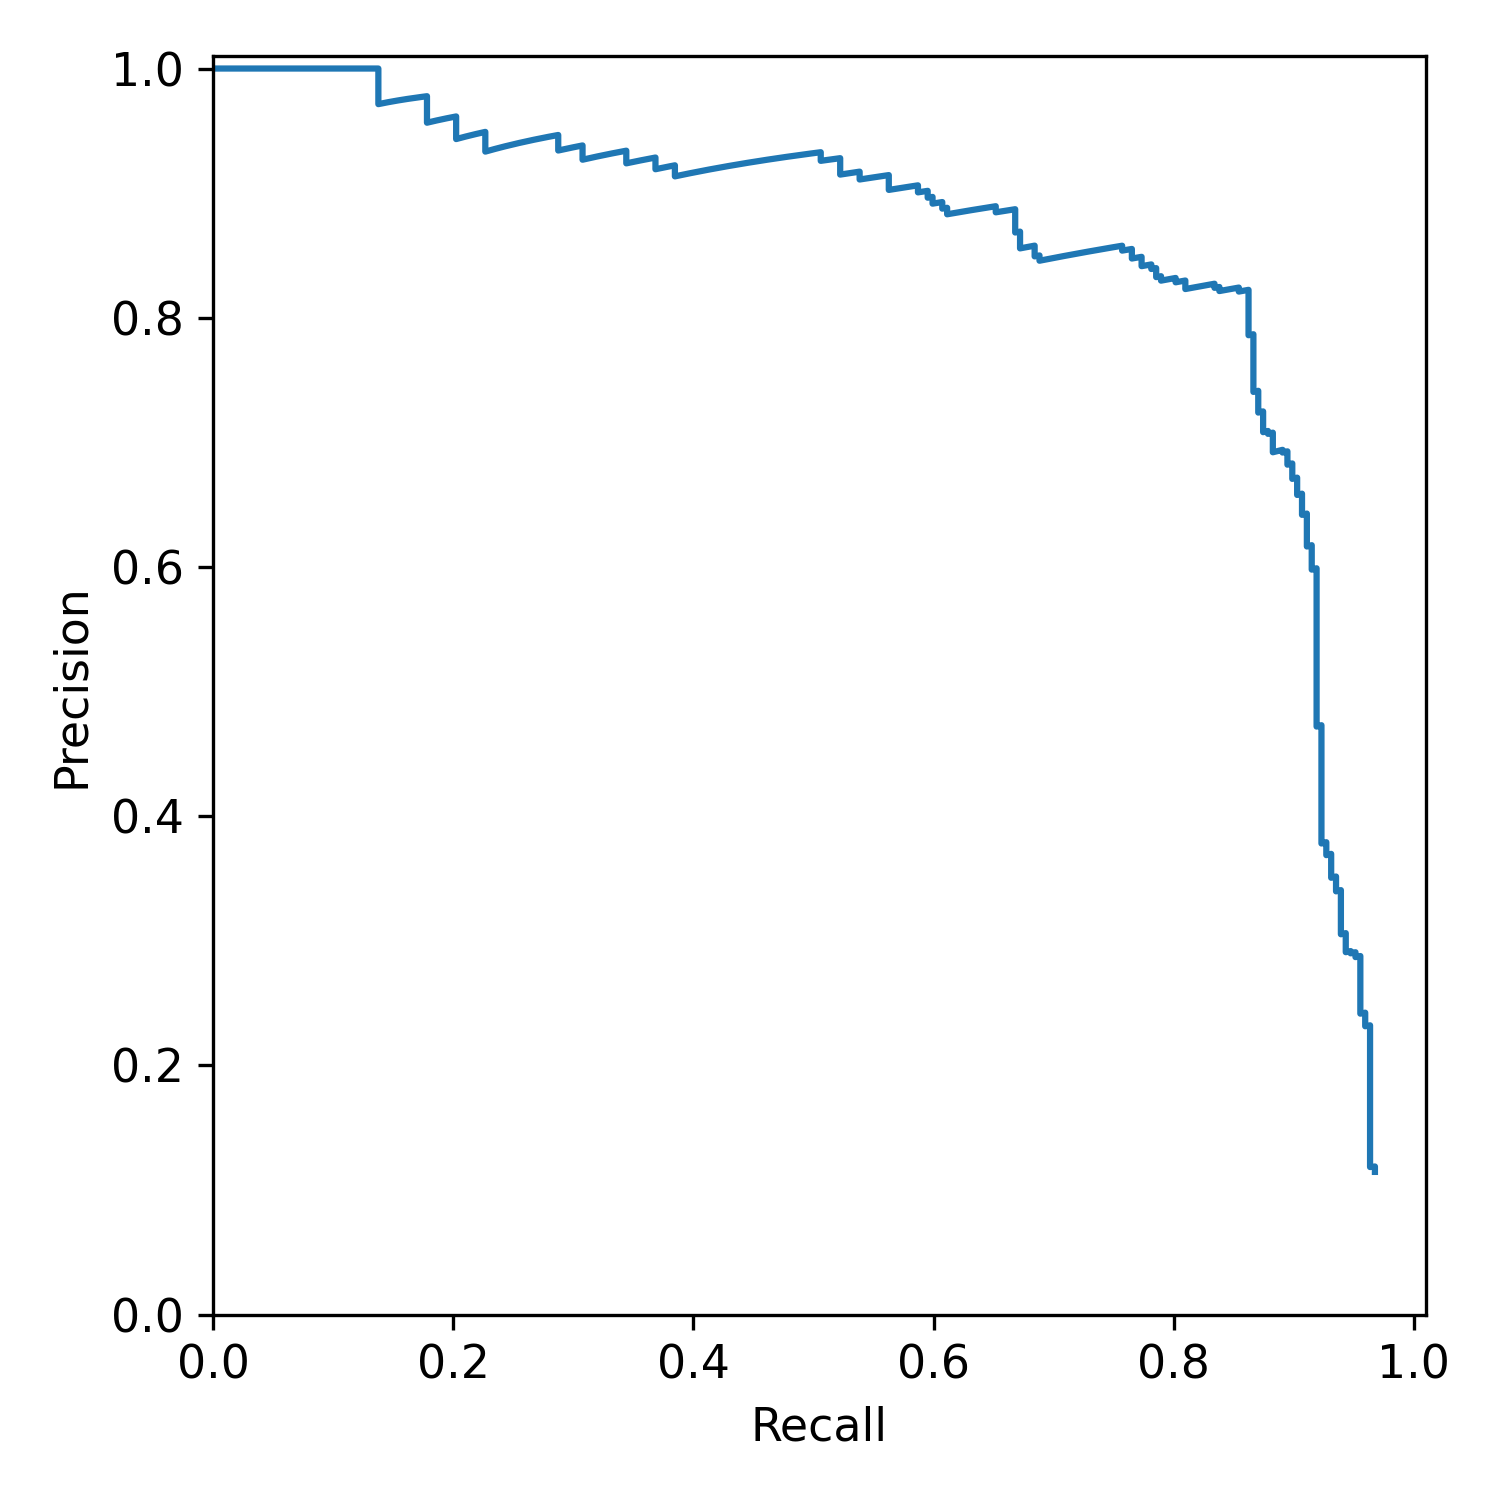

In [6]:
from PIL import Image
Image.open('PR_curve.png')